# Préprocessiong

In [6]:
os.getcwd()

'C:\\Users\\ALI ZATCHI Afzal\\Desktop\\PJET PYthon\\Donnees & Préprocessing Code'

In [3]:
import pandas as pd
import numpy as np
import time
import substring
import sklearn
import seaborn as sns
import scipy as stats
import os

### Fusion des données

In [90]:
####
os.chdir("C:/Users/ALI ZATCHI Afzal/Desktop/PJET PYthon/Donnees & Préprocessing Code/base_for_preprocessing")

In [198]:
ES91_maison_0_604=pd.read_csv("ES91_maison_0_604.csv") # ok
ES91_maison_605_=pd.read_csv("ES91_maison_605_.csv") # ok
HS92_maison=pd.read_csv("HS92_maison.csv") # ok 
PA75_maison=pd.read_csv("PA75_maison.csv") # ok
YV78_maison_749_1274=pd.read_csv("YV78_maison_749_1274.csv") # ok
YV78_maison_de_0_749=pd.read_csv("YV78_maison_de_0_749.csv") # ok

In [199]:
donnees_Ile_De_France = pd.concat([ES91_maison_0_604,
                                   ES91_maison_605_,
                                   HS92_maison,
                                   PA75_maison,
                                   YV78_maison_de_0_749,
                                   YV78_maison_749_1274],ignore_index=True)

In [200]:
#donnees_Ile_De_France.drop(donnees_Ile_De_France.index[[2698,2875,2919,3115,3116,3127]],inplace=True)
data=donnees_Ile_De_France

In [201]:
data

,Unnamed: 0,id_hourse,Addresse,Titre,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Ascenseur,Terrasse,Garage,Prix_sur,Reference,Date_publication,Date_modification,Titre_description,Description
0,0,ES91_0,Boussy-Saint-Antoine 91800,"Achat maison 4 pièces 128 m², Boussy-Saint-Ant...",414 500 €,128 m²,4 pièces,3 chambres,2 places de parking,Jardin,NaN,NaN,NaN,3 238 €/m²,Réf. de l’annonce : 098906E1QEZB,Publiée le 12 oct. 2020,Modifiée le 6 nov. 2020,Descriptif de cette maison à vendre de 4 pièce...,"Maison Boussy Saint Antoine 4 pièce(s) 128 m2,..."
1,1,ES91_1,Chilly-Mazarin 91380 (Gravigny),"Achat maison 4 pièces 82 m², Chilly-Mazarin - ...",357 000 €,"81,78 m²",4 pièces,3 chambres,3 places de parking,Jardin,NaN,1 terrasse,NaN,4 365 €/m²,Réf. de l’annonce : 3310,Publiée il y a plus de 2 mois,Modifiée le 12 oct. 2020,Descriptif de cette maison à vendre de 4 pièce...,Vente d'une maison F4 à CHILLY MAZARIN. MAISON...
2,2,ES91_2,Sainte-Geneviève-des-Bois 91700 (Georges Pitard),"Achat maison 6 pièces 163 m², Sainte-Geneviève...",450 000 €,163 m²,6 pièces,4 chambres,3 places de parking,Jardin,NaN,NaN,NaN,2 761 €/m²,Réf. de l’annonce : 09891902QHRQ,Publiée il y a plus de 2 mois,Modifiée le 27 nov. 2020,Descriptif de cette maison à vendre de 6 pièce...,Maison STE GENEVIEVE DES BOIS 6 pièce(s) 160 m...
3,3,ES91_3,Longjumeau 91160 (Gubanski - Sud),"Achat maison 7 pièces 154 m², Longjumeau - 467...",467 500 €,154 m²,7 pièces,4 chambres,8 places de parking,Jardin,NaN,NaN,NaN,3 036 €/m²,Réf. de l’annonce : 098023E1LUDE,Publiée il y a plus de 2 mois,Modifiée le 6 nov. 2020,Descriptif de cette maison à vendre de 7 pièce...,Maison Longjumeau 7 pièce(s) 154 m2 / 2 double...
4,4,ES91_4,Morsang-sur-Orge 91390 (Langevin),"Achat maison 7 pièces 155 m², Morsang-sur-Orge...",465 000 €,155 m²,7 pièces,5 chambres,6 places de parking,Jardin,NaN,NaN,NaN,3 000 €/m²,Réf. de l’annonce : 098061E1LN0N,Publiée il y a plus de 2 mois,Modifiée le 1 déc. 2020,Descriptif de cette maison à vendre de 7 pièce...,Maison Morsang Sur Orge. EXCLUSIVITÉ - MORSANG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,515,YV78_1269,Bouafle 78410,"Achat maison 7 pièces 245 m², Bouafle - 625 000 €",625 000 €,245 m²,7 pièces,4 chambres,2 places de parking,Jardin,NaN,1 terrasse,NaN,2 551 €/m²,NaN,Publiée il y a plus de 2 mois,Réf. de l’annonce : 577,Descriptif de cette maison à vendre de 7 pièce...,Maison 144m² + dépendance 101m². Dans la ville...
3959,516,YV78_1270,Porcheville 78440,"Achat maison 6 pièces 145 m², Porcheville - 28...",280 000 €,145 m²,6 pièces,4 chambres,2 places de parking,Jardin,NaN,NaN,NaN,1 862 €/m²,Réf. de l’annonce : 007055E1NFTG,Publiée il y a plus de 2 mois,Modifiée le 14 nov. 2020,Descriptif de cette maison à vendre de 6 pièce...,Maison familiale Porcheville 7 pièce(s) 145 m2...
3960,517,YV78_1271,Sartrouville 78500 (Le Val Notre-Dame),"Achat maison 5 pièces 160 m², Sartrouville - 5...",566 000 €,160 m²,5 pièces,3 chambres,2 places de parking,Jardin,NaN,NaN,Garage,3 538 €/m²,Réf. de l’annonce : 749571019-4,Publiée il y a plus de 2 mois,Modifiée le 2 déc. 2020,Descriptif de cette maison à vendre de 5 pièce...,"Pavillon Beaux Volumes. Sartrouville, dans un ..."
3961,518,YV78_1272,Verneuil-sur-Seine 78480 (Les Clairières - Les...,"Achat maison 7 pièces 145 m², Verneuil-sur-Sei...",484 000 €,145 m²,7 pièces,5 chambres,2 parkings extérieurs,Jardin de 801 m²,NaN,NaN,2 garages,3 172 €/m²,Réf. de l’annonce : 31490007,Publiée il y a plus de 2 mois,Modifiée le 21 oct. 2020,Descriptif de cette maison à vendre de 7 pièce...,Une maison des années 1970 située dans un cadr...


### Fonction de Nettoyage

In [202]:
def Clean(data):
    # Copie de la data
    donnee=data
    
    donnee.drop(columns='Unnamed: 0',inplace=True)
    # Prix
    donnee["PrixR"]=donnee.Prix.str.replace("€","").str.replace(" ","")
    donnee["PrixR"]=donnee['PrixR'].astype(float)

    ## Surface
    donnee['SurfaceR']=donnee.Surface.str.replace("m²","").str.replace(",",".")
    donnee['SurfaceR']=donnee.SurfaceR.astype(float)

    ## Pieces
    donnee['Nb_PiecesR']=donnee.Nb_piece.str.replace("pièce","").str.replace("s","").str.replace(" ","")
    donnee["Nb_PiecesR"]=donnee.Nb_PiecesR.astype(float)

    ### Chambres
    donnee['Nb_ChambresR']=donnee.Nb_chambre.str.replace("chambre","").str.replace("s","").str.replace(" ","")
    donnee["Nb_ChambresR"]=donnee.Nb_ChambresR.astype(float)

    ### Adresse  et  Zone: Emplacement( Ville, Commune, Je ne sais pas trop)

    ## Exemple Asnières-sur-Seine 92600 (Coubertin)
    #   DepartR= 92600    ZoneR = "Asnières-sur-Seine" 
    #   EmplacementR = "(Coubertin)"

    # Departement
    dep=[''.join([i for i in j if i.isdigit()]) for j in donnee.Addresse]
    dep=[int(i) for i in dep]
    donnee["DepartR"]=dep
    
    depl=[''.join([i for i in j if i.isdigit()]) for j in data.Addresse]
    depl=[i[:2] for i in depl]
    donnee["Dep"]=depl

    # ZoneR
    secteur=[''.join([i for i in j if not i.isdigit()]) for j in donnee.Addresse]
    donnee["ZoneR"]=secteur


    ##  Emplacement exact( Précisé entre Parenthèses)
    donnee["EmplacementR"]=[substring.substringByChar(i, startChar="(", endChar=")").replace('(','').replace(')','') if i.find('(')>=0 else i for i in donnee.ZoneR]

    ### Parking
    park=donnee.Parking.fillna('')
    park.replace('',np.nan)
    park=[''.join([i for i in j if i.isdigit()]) for j in park]
    park=[np.nan if i=='' else float(i) for i in park]
    donnee["ParkingR"]=park

    ## Les Nan pour les parking représentent les maisons sans parking( je pense)
    donnee['ParkingR']=donnee['ParkingR'].fillna(0)

    ## Jardin 
    donnee['JardinR']=~donnee.Jardin.isna()

    ### Ascenseur : Inutile visuellement Ne contient que les Na/ En meme tps
    # Les maisons n'ont pas d'ascenseur
    return donnee

In [203]:
data=Clean(data)

In [204]:
data

,id_hourse,Addresse,Titre,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Ascenseur,...,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,DepartR,Dep,ZoneR,EmplacementR,ParkingR,JardinR
0,ES91_0,Boussy-Saint-Antoine 91800,"Achat maison 4 pièces 128 m², Boussy-Saint-Ant...",414 500 €,128 m²,4 pièces,3 chambres,2 places de parking,Jardin,NaN,...,414500.0,128.00,4.0,3.0,91800,91,Boussy-Saint-Antoine,Boussy-Saint-Antoine,2.0,True
1,ES91_1,Chilly-Mazarin 91380 (Gravigny),"Achat maison 4 pièces 82 m², Chilly-Mazarin - ...",357 000 €,"81,78 m²",4 pièces,3 chambres,3 places de parking,Jardin,NaN,...,357000.0,81.78,4.0,3.0,91380,91,Chilly-Mazarin (Gravigny),Gravigny,3.0,True
2,ES91_2,Sainte-Geneviève-des-Bois 91700 (Georges Pitard),"Achat maison 6 pièces 163 m², Sainte-Geneviève...",450 000 €,163 m²,6 pièces,4 chambres,3 places de parking,Jardin,NaN,...,450000.0,163.00,6.0,4.0,91700,91,Sainte-Geneviève-des-Bois (Georges Pitard),Georges Pitard,3.0,True
3,ES91_3,Longjumeau 91160 (Gubanski - Sud),"Achat maison 7 pièces 154 m², Longjumeau - 467...",467 500 €,154 m²,7 pièces,4 chambres,8 places de parking,Jardin,NaN,...,467500.0,154.00,7.0,4.0,91160,91,Longjumeau (Gubanski - Sud),Gubanski - Sud,8.0,True
4,ES91_4,Morsang-sur-Orge 91390 (Langevin),"Achat maison 7 pièces 155 m², Morsang-sur-Orge...",465 000 €,155 m²,7 pièces,5 chambres,6 places de parking,Jardin,NaN,...,465000.0,155.00,7.0,5.0,91390,91,Morsang-sur-Orge (Langevin),Langevin,6.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,YV78_1269,Bouafle 78410,"Achat maison 7 pièces 245 m², Bouafle - 625 000 €",625 000 €,245 m²,7 pièces,4 chambres,2 places de parking,Jardin,NaN,...,625000.0,245.00,7.0,4.0,78410,78,Bouafle,Bouafle,2.0,True
3959,YV78_1270,Porcheville 78440,"Achat maison 6 pièces 145 m², Porcheville - 28...",280 000 €,145 m²,6 pièces,4 chambres,2 places de parking,Jardin,NaN,...,280000.0,145.00,6.0,4.0,78440,78,Porcheville,Porcheville,2.0,True
3960,YV78_1271,Sartrouville 78500 (Le Val Notre-Dame),"Achat maison 5 pièces 160 m², Sartrouville - 5...",566 000 €,160 m²,5 pièces,3 chambres,2 places de parking,Jardin,NaN,...,566000.0,160.00,5.0,3.0,78500,78,Sartrouville (Le Val Notre-Dame),Le Val Notre-Dame,2.0,True
3961,YV78_1272,Verneuil-sur-Seine 78480 (Les Clairières - Les...,"Achat maison 7 pièces 145 m², Verneuil-sur-Sei...",484 000 €,145 m²,7 pièces,5 chambres,2 parkings extérieurs,Jardin de 801 m²,NaN,...,484000.0,145.00,7.0,5.0,78480,78,Verneuil-sur-Seine (Les Clairières - Les Rena...,Les Clairières - Les Renardières,2.0,True


### Debut d'Etudes descriptives

In [206]:
donnee=data
donnee.columns

Index(['id_hourse', 'Addresse', 'Titre', 'Prix', 'Surface', 'Nb_piece',
       'Nb_chambre', 'Parking', 'Jardin', 'Ascenseur', 'Terrasse', 'Garage',
       'Prix_sur', 'Reference', 'Date_publication', 'Date_modification',
       'Titre_description', 'Description', 'PrixR', 'SurfaceR', 'Nb_PiecesR',
       'Nb_ChambresR', 'DepartR', 'Dep', 'ZoneR', 'EmplacementR', 'ParkingR',
       'JardinR'],
      dtype='object')

In [207]:
dataSubset=donnee[['id_hourse','PrixR', 'SurfaceR', 'Nb_PiecesR',
       'Nb_ChambresR', 'ParkingR', 'JardinR', 'Dep', 'ZoneR',
       'EmplacementR']]

In [208]:
dataSubset

,id_hourse,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR,JardinR,Dep,ZoneR,EmplacementR
0,ES91_0,414500.0,128.00,4.0,3.0,2.0,True,91,Boussy-Saint-Antoine,Boussy-Saint-Antoine
1,ES91_1,357000.0,81.78,4.0,3.0,3.0,True,91,Chilly-Mazarin (Gravigny),Gravigny
2,ES91_2,450000.0,163.00,6.0,4.0,3.0,True,91,Sainte-Geneviève-des-Bois (Georges Pitard),Georges Pitard
3,ES91_3,467500.0,154.00,7.0,4.0,8.0,True,91,Longjumeau (Gubanski - Sud),Gubanski - Sud
4,ES91_4,465000.0,155.00,7.0,5.0,6.0,True,91,Morsang-sur-Orge (Langevin),Langevin
...,...,...,...,...,...,...,...,...,...,...
3958,YV78_1269,625000.0,245.00,7.0,4.0,2.0,True,78,Bouafle,Bouafle
3959,YV78_1270,280000.0,145.00,6.0,4.0,2.0,True,78,Porcheville,Porcheville
3960,YV78_1271,566000.0,160.00,5.0,3.0,2.0,True,78,Sartrouville (Le Val Notre-Dame),Le Val Notre-Dame
3961,YV78_1272,484000.0,145.00,7.0,5.0,2.0,True,78,Verneuil-sur-Seine (Les Clairières - Les Rena...,Les Clairières - Les Renardières


In [209]:
dataSubset.describe()

,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR
count,3.906000e+03,3887.000000,3899.000000,3868.000000,3963.000000
mean,6.713327e+05,151.943898,6.196717,3.919080,1.173354
std,1.302842e+06,85.914124,3.619120,1.436679,2.462946
min,3.631500e+04,16.510000,1.000000,1.000000,0.000000
25%,3.265000e+05,98.000000,5.000000,3.000000,0.000000
50%,4.550000e+05,132.000000,6.000000,4.000000,0.000000
75%,6.990000e+05,176.000000,7.000000,5.000000,2.000000
max,6.000000e+07,988.000000,166.000000,32.000000,99.000000


In [210]:
### 
dataSubset.corr()

,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR,JardinR
PrixR,1.000000,0.537807,0.423464,0.350911,-0.014471,-0.093703
SurfaceR,0.537807,1.000000,0.525478,0.695656,0.115452,0.050577
Nb_PiecesR,0.423464,0.525478,1.000000,0.582181,0.059840,0.066042
Nb_ChambresR,0.350911,0.695656,0.582181,1.000000,0.078436,0.098454
ParkingR,-0.014471,0.115452,0.059840,0.078436,1.000000,0.115034
JardinR,-0.093703,0.050577,0.066042,0.098454,0.115034,1.000000


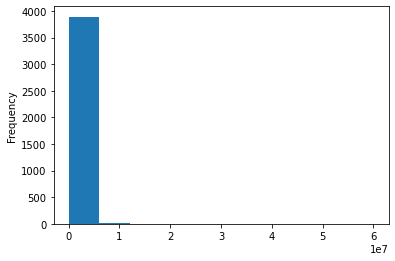

In [211]:
dataSubset.PrixR.plot.hist()

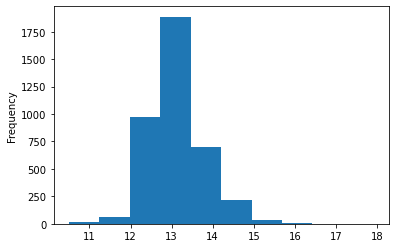

In [212]:
dataSubset.PrixR.apply(np.log).plot.hist()

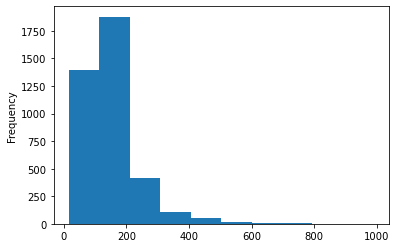

In [213]:
dataSubset['SurfaceR'].plot.hist()

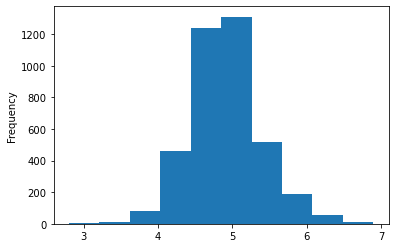

In [214]:
dataSubset['SurfaceR'].apply(np.log).plot.hist()

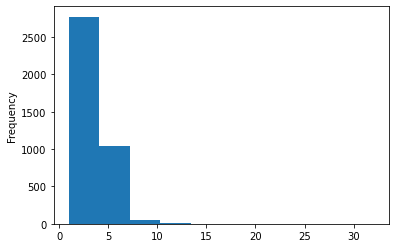

In [215]:
dataSubset['Nb_ChambresR'].plot.hist()

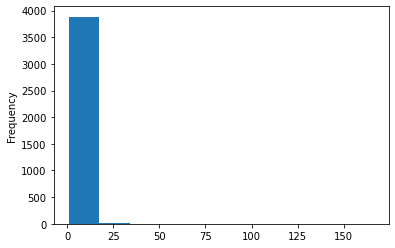

In [216]:
dataSubset['Nb_PiecesR'].plot.hist()

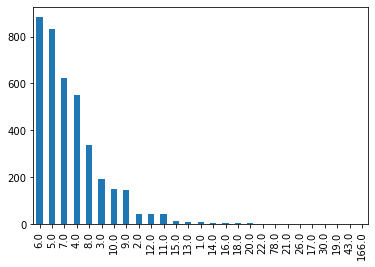

In [217]:
dataSubset['Nb_PiecesR'].value_counts().plot.bar()

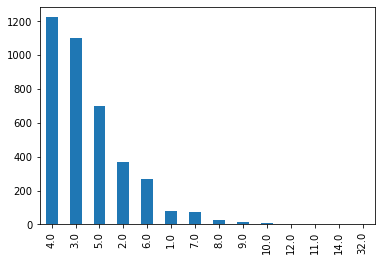

In [218]:
dataSubset['Nb_ChambresR'].value_counts().plot.bar()

In [219]:
import seaborn as sns
import scipy as stats

In [220]:
Quanti=dataSubset[['PrixR', 'SurfaceR', 'Nb_PiecesR','Nb_ChambresR','ParkingR']]
Quanti

,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR
0,414500.0,128.00,4.0,3.0,2.0
1,357000.0,81.78,4.0,3.0,3.0
2,450000.0,163.00,6.0,4.0,3.0
3,467500.0,154.00,7.0,4.0,8.0
4,465000.0,155.00,7.0,5.0,6.0
...,...,...,...,...,...
3958,625000.0,245.00,7.0,4.0,2.0
3959,280000.0,145.00,6.0,4.0,2.0
3960,566000.0,160.00,5.0,3.0,2.0
3961,484000.0,145.00,7.0,5.0,2.0


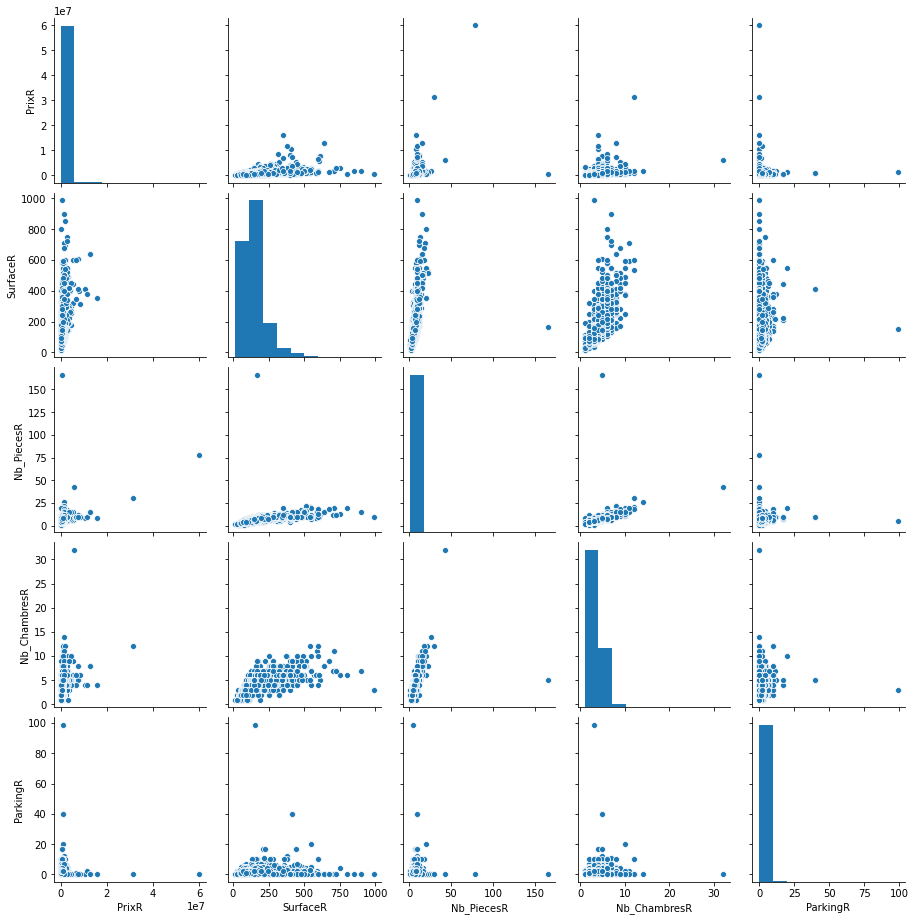

In [221]:
sns.pairplot(Quanti)

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [223]:
Quanti=Quanti.dropna()

In [232]:
Quanti.shape

(3851, 5)

In [233]:
x_train, x_test, y_train, y_test = train_test_split(
    Quanti[[i for i in Quanti.columns if i != 'PrixR']],
    Quanti['PrixR'].to_numpy().ravel(),
    test_size=0.2, random_state=0
)

In [234]:
ols = LinearRegression()
ols.fit(x_train, y_train)
y_pred = ols.predict(x_test)

In [235]:
ols.intercept_

-2748.0789668256184

In [237]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [238]:
r2 = r2_score(y_test, y_pred)
r2

0.2659072594445695

In [239]:
mse = mean_squared_error(y_test, y_pred)
mse

274004369069.08533

In [240]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [241]:
results_sm = sm.OLS(Quanti['PrixR'], 
        Quanti[[i for i in Quanti.columns if i != 'PrixR']]).fit()

In [242]:

results_sm = sm.OLS(Quanti['PrixR'], 
        Quanti[[i for i in Quanti.columns if i != 'PrixR']],
                   cov_type='HC1').fit()

In [243]:
results_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PrixR   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.601
Method:                 Least Squares   F-statistic:                              1450.
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                        23:33:19   Log-Likelihood:                         -56837.
No. Observations:                3851   AIC:                                  1.137e+05
Df Residuals:                    3847   BIC:                                  1.137e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
SurfaceR      5145.2753    167.463     30.725      0.000    4816.951    5473.599
Nb_PiecesR   -1554.1740   3669.421     -0.424      0.672   -8748.371    5640.023
Nb_ChambresR -2.558e+04   8095.500     -3.160      0.002   -4.15e+04   -9710.407
ParkingR     -2.192e+04   4040.788     -5.425      0.000   -2.98e+04    -1.4e+04
==============================================================================
Omnibus:                     5605.554   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3266147.034
Skew:                           8.474   Prob(JB):                         0.00
Kurtosis:                     144.661   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
scaler = StandardScaler()
scaler.fit(Quanti)
df_scaled = scaler.transform(Quanti.fillna(0))

In [246]:
column_names = Quanti.columns[Quanti.columns != "PrixR"]
X = df_scaled[:, Quanti.columns != "PrixR"]
y = Quanti["PrixR"].copy()
y[pd.isnull(y)] = y.median()
y = y.values.ravel()
#y = df_scaled[:, df.columns == 'rep16_frac']

In [247]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [248]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [249]:
pd.isnull(ytrain).sum()

0

In [250]:
lasso_ = Lasso(fit_intercept=True)
lasso_.fit(xtrain, ytrain)

Lasso()

In [251]:
lasso_.coef_

array([ 448365.20284212,   -6170.04803386,  -37418.71997658,
       -105396.57296799])

In [252]:
column_names[lasso_.coef_ != 0]

Index(['SurfaceR', 'Nb_PiecesR', 'Nb_ChambresR', 'ParkingR'], dtype='object')